In [1]:
import numpy as np

import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# load the attention vector

MODEL_NAME = 'ni_2param_onebound_classify_split0_reglog_clamp2/'
FIGDIR = '../figures_' + MODEL_NAME
DATADIR = '../results_' + MODEL_NAME
MODELDIR = '../trained_model_' + MODEL_NAME

'/home/jenny/sincnet_eeg/notebook'

In [3]:
print(MODELDIR)

../trained_model_ni_2param_onebound_classify_split0_reglog_clamp2/


s109performance.png


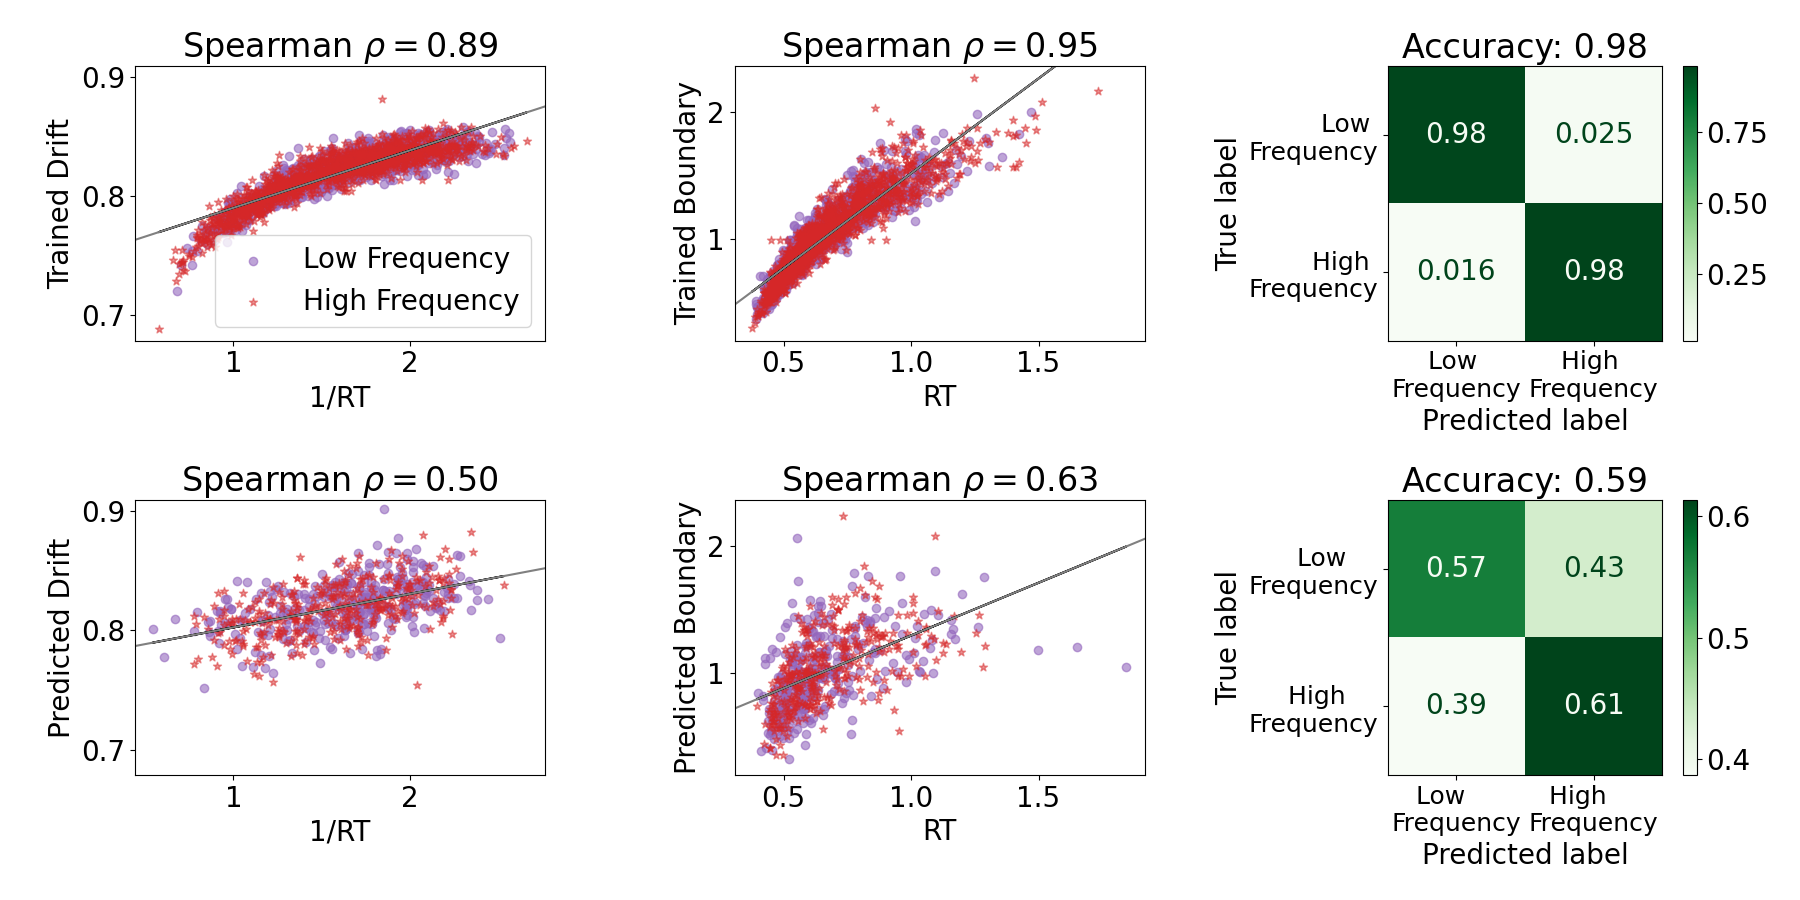

s100performance.png


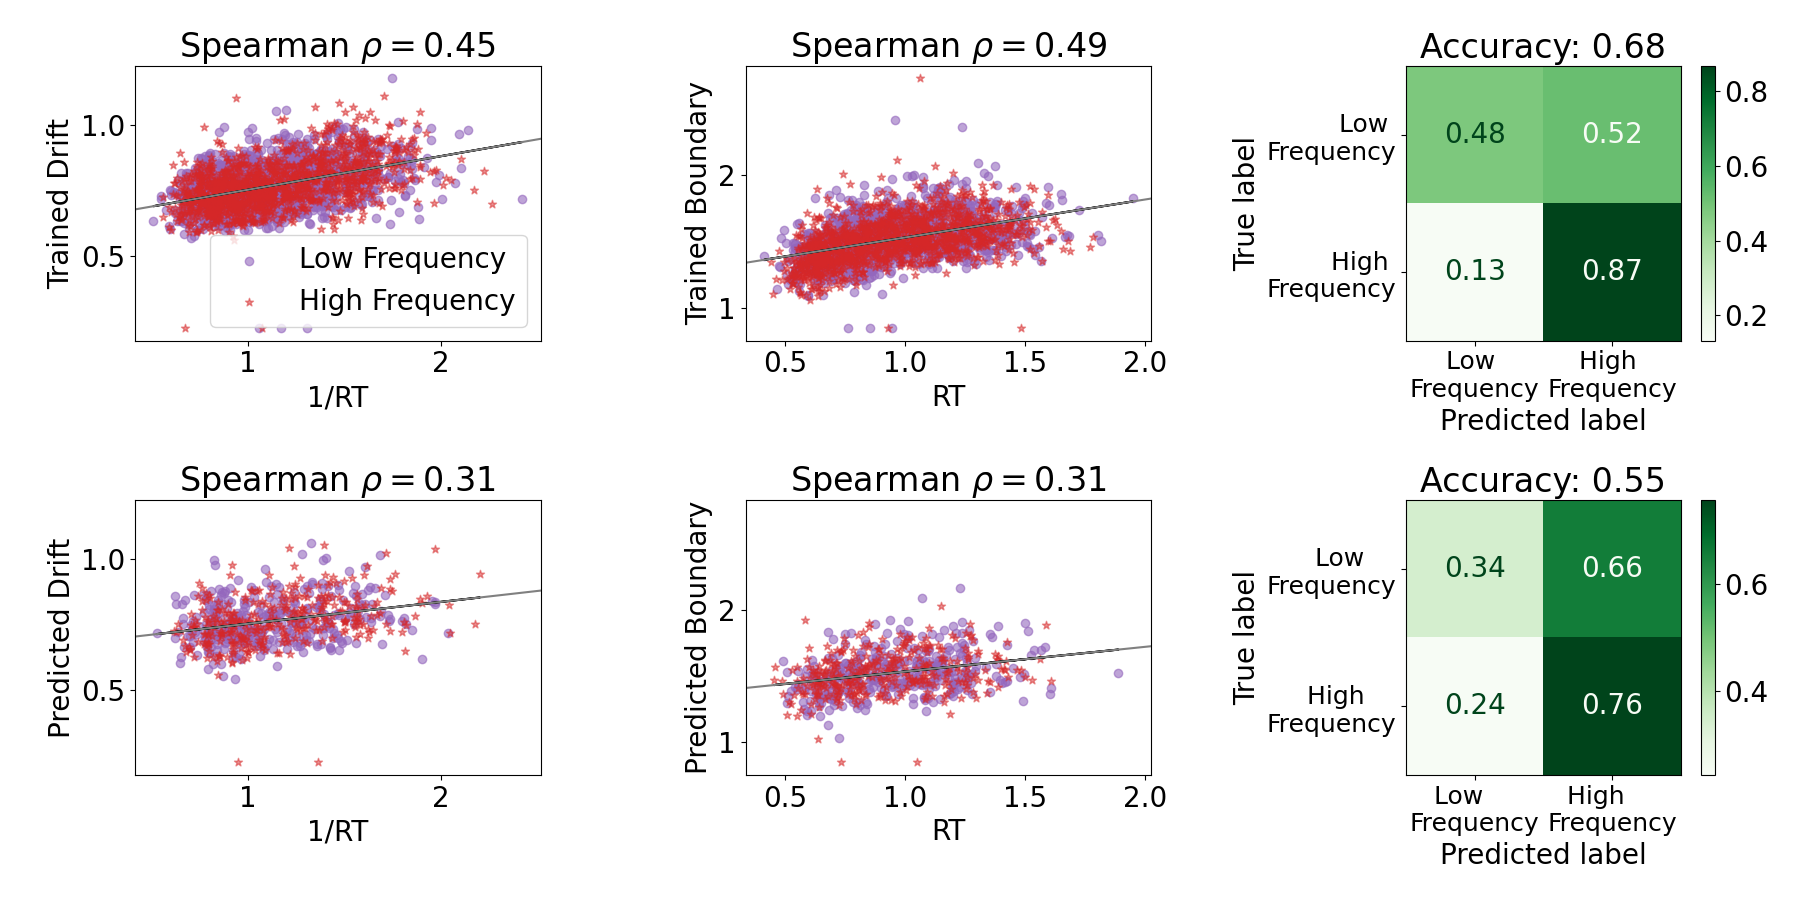

s59performance.png


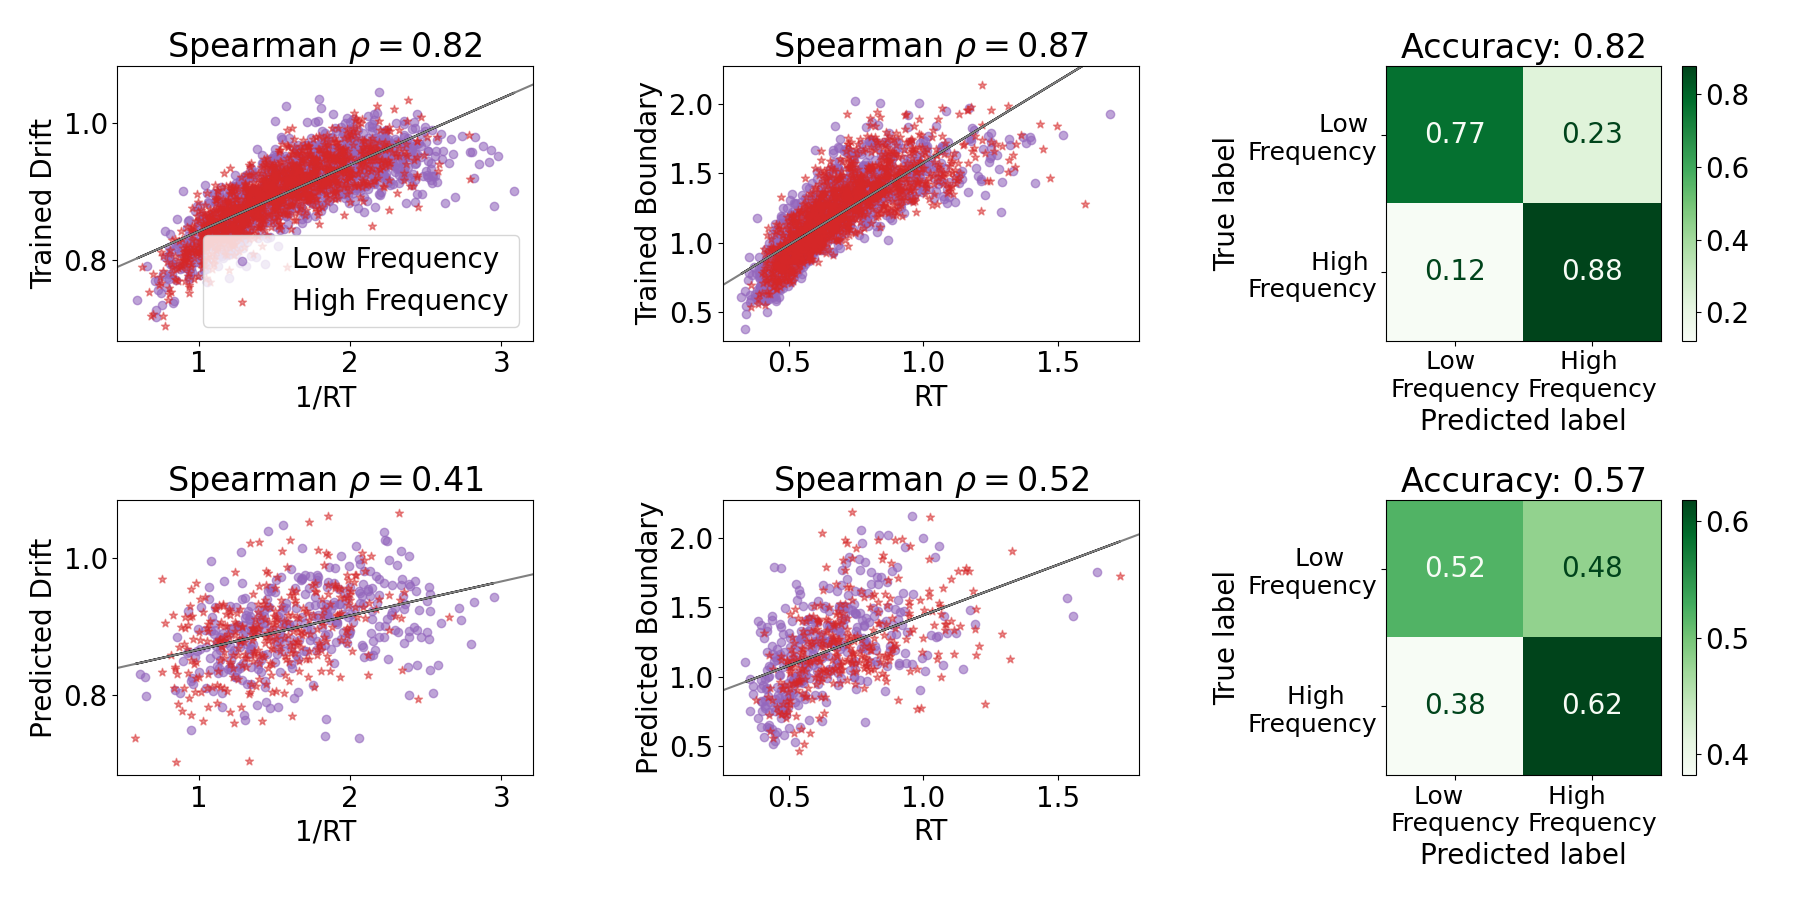

s110performance.png


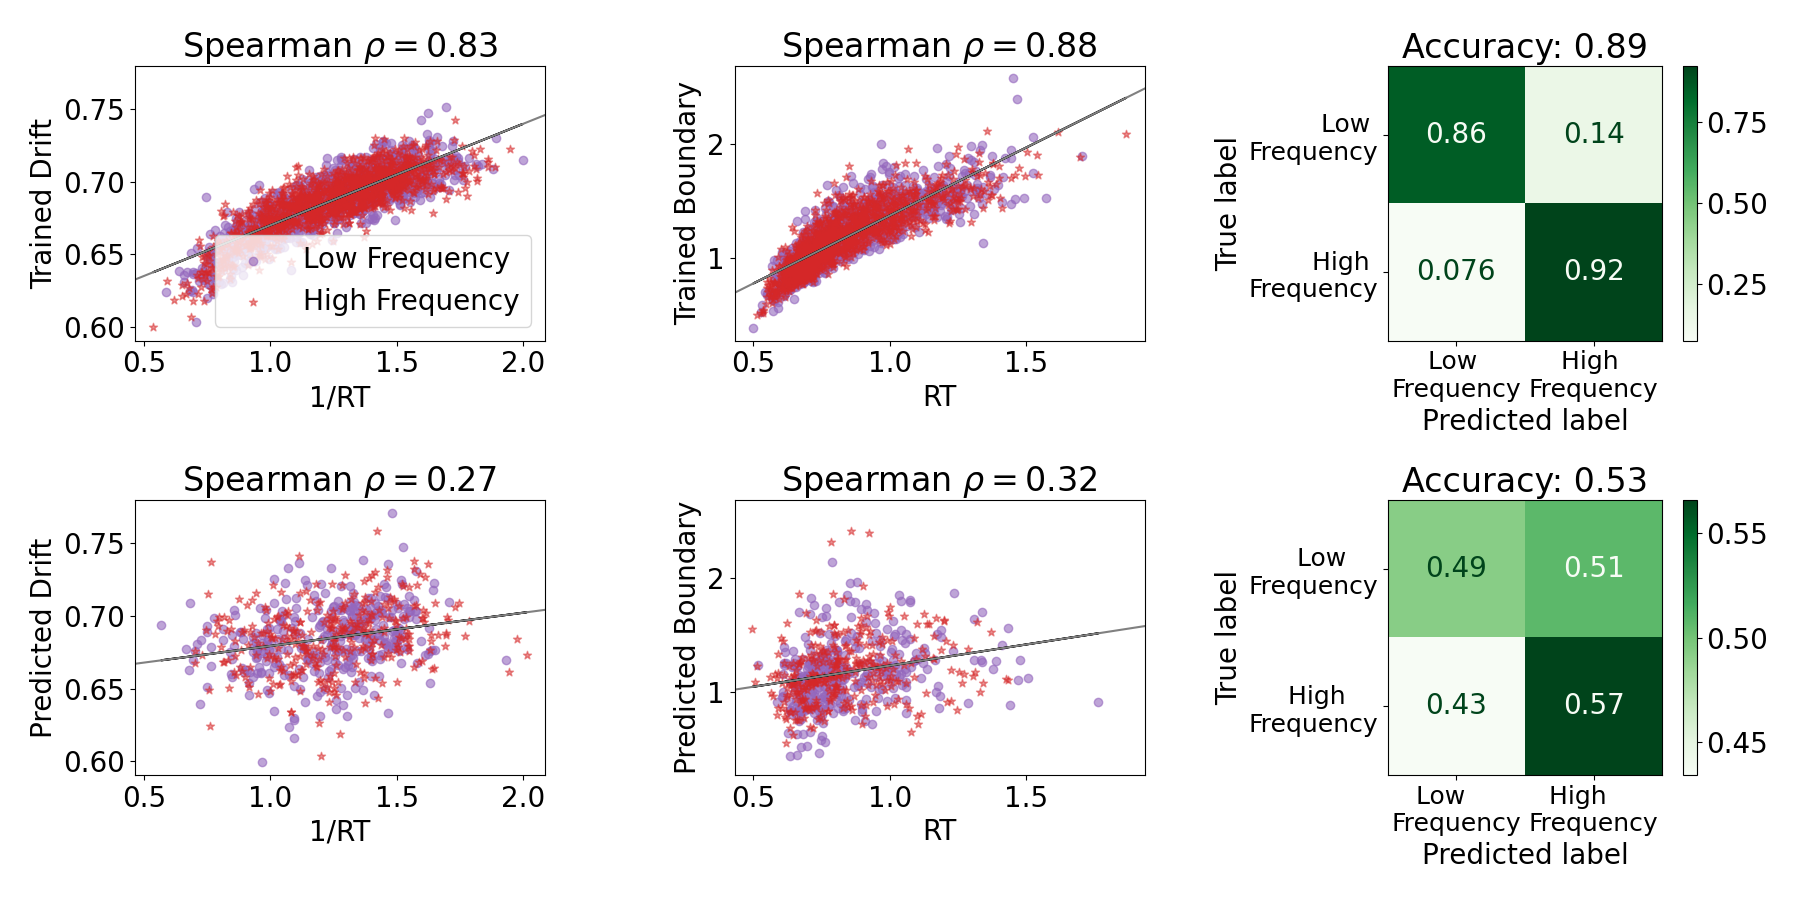

In [70]:
# Load results
fnames = [i for i in os.listdir(FIGDIR) if 'performance' in i]
for f in fnames:
    img = Image.open(FIGDIR + f)
    print(f)
    display(img)

In [228]:

plt.rcParams.update({'font.size': 18})

In [229]:


def getFilt(model_dic: dict, branchName: str, sr: int, min_freq=1, min_band=2, cutoff=50):
    '''branchName: 'bound', 'drift', or 'choice' '''
    keys = [f for f in model_dic.keys() if 'sinc_cnn2d' in f and branchName in f]
    print('found keys: ', keys)
    key_b1, key_band = [k for k in keys if 'filt_b1' in k], [k for k in keys if 'filt_band' in k]
    p_low = model_dic[key_b1[0]]
    p_band = model_dic[key_band[0]]
    filt_beg_freq = torch.clamp(torch.abs(p_low) + min_freq / sr, min_freq/sr, (cutoff-min_band)/sr)
    filt_end_freq = torch.clamp(filt_beg_freq + torch.abs(p_band) + min_band / sr, \
                                int(min_freq + min_band) / sr, cutoff / sr)

    # filt_beg_freq = torch.clamp(torch.abs(self.filt_b1) + min_freq / self.freq_scale, min_freq / self.freq_scale, \
    #                             ((self.cutoff) - int(min_band)) / self.freq_scale)
    #
    # filt_end_freq = torch.clamp(filt_beg_freq + (torch.abs(self.filt_band) + min_band / self.freq_scale), \
    #                             int(min_freq + min_band) / self.freq_scale, (self.cutoff) / self.freq_scale)

    filt_beg_freq = filt_beg_freq.cpu().numpy() * sr
    filt_end_freq = filt_end_freq.cpu().numpy() * sr

    return p_low, p_band, filt_beg_freq, filt_end_freq



found keys:  ['module.sinc_cnn2d_drift_bound.filt_b1', 'module.sinc_cnn2d_drift_bound.filt_band']
=======s109===============


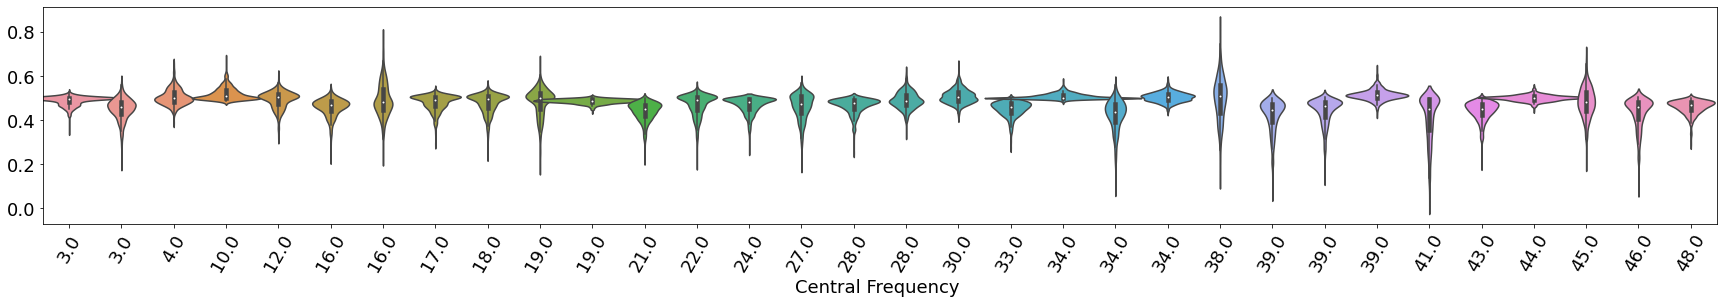

[ 3 25 19 17  2 21 28  6 22  4 16  0 10 29  7  9  8 12 13 15 14  5 31  1
 18 24 27 11 30 20 23 26]


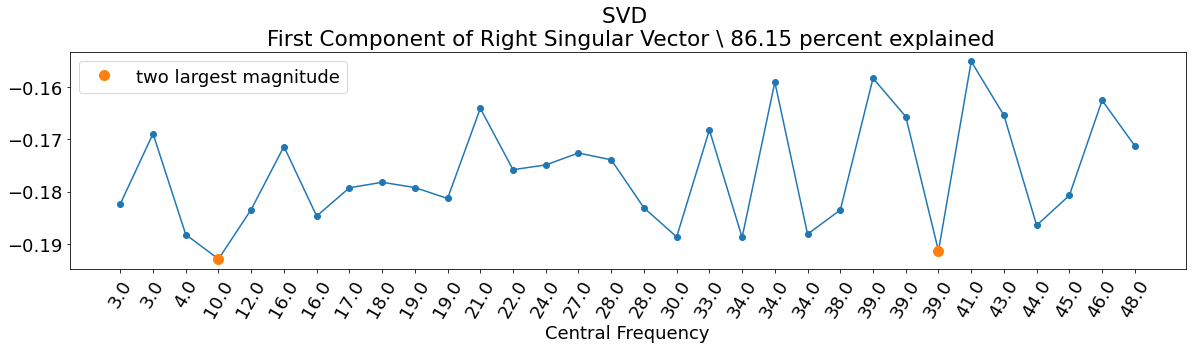

found keys:  ['module.sinc_cnn2d_drift_bound.filt_b1', 'module.sinc_cnn2d_drift_bound.filt_band']
=======s100===============


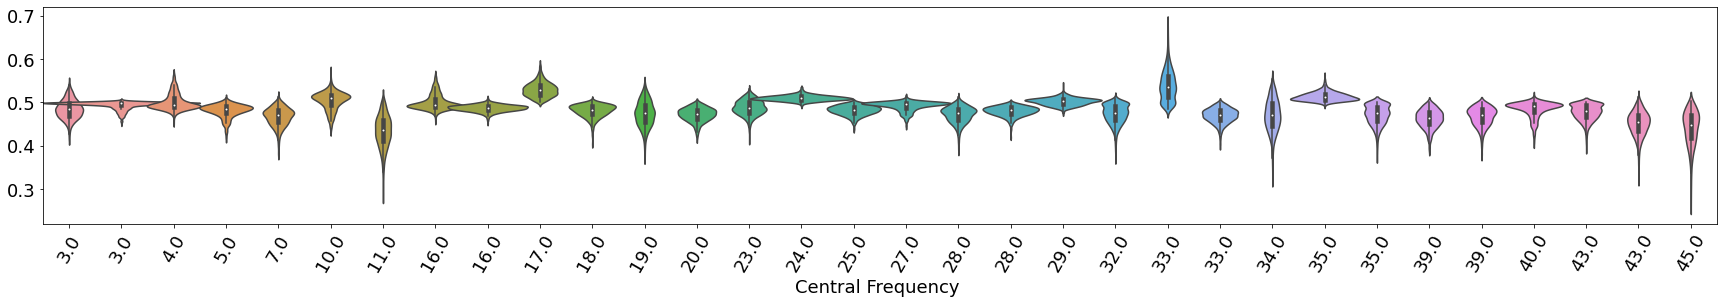

[21  9 24 14  5 19  2  7  1 16 13  8  0 28 15  3 10 18 29 11 20 12 17 25
 23 22 27  4 26 30 31  6]


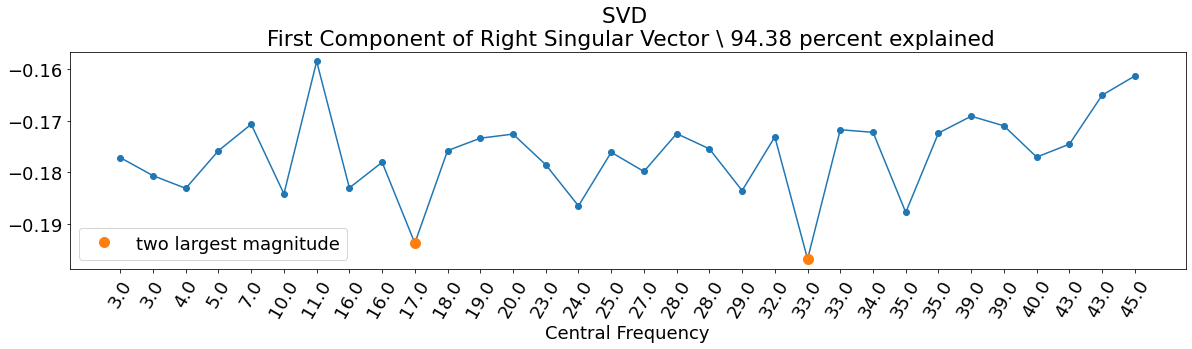

found keys:  ['module.sinc_cnn2d_drift_bound.filt_b1', 'module.sinc_cnn2d_drift_bound.filt_band']
=======s59===============


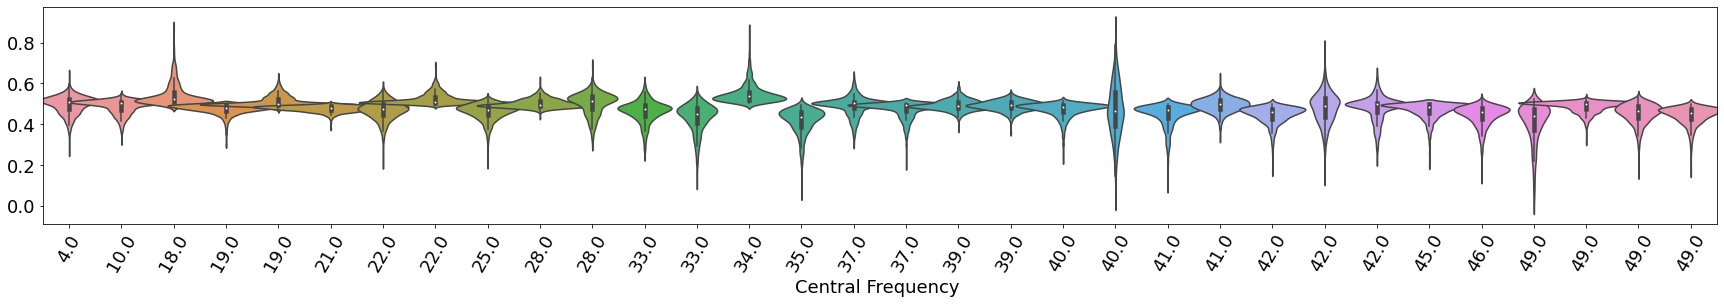

[13  2  7  4 10  9  0 22 17 15 18  1 29 24 25  5  3 16 19  6 26 20 11  8
 30 23 21 27 31 12 14 28]


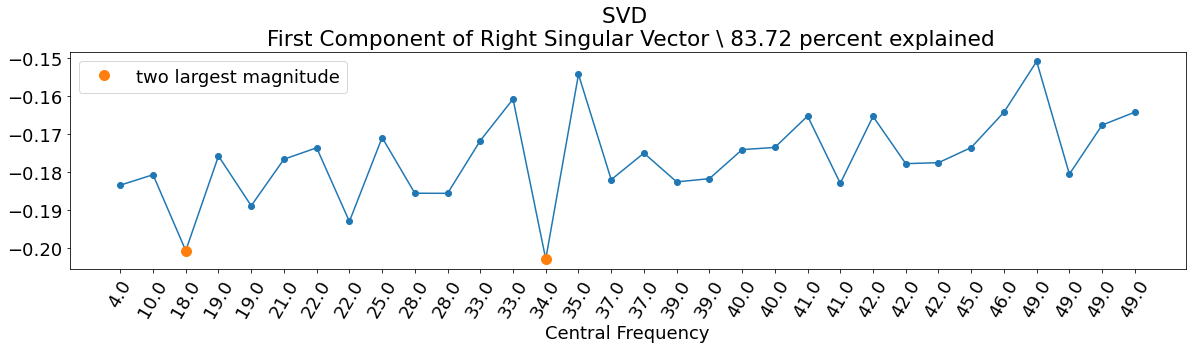

found keys:  ['module.sinc_cnn2d_drift_bound.filt_b1', 'module.sinc_cnn2d_drift_bound.filt_band']
=======s110===============


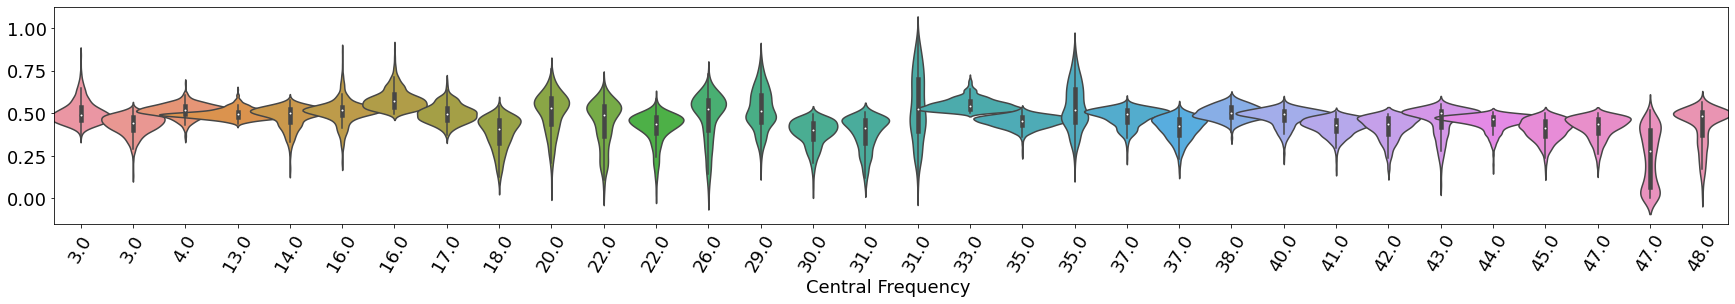

[ 6 16 17 19 13  2  9  5 22  0  3  7 12  4 20 23 26 18 27 10 31  1 24 11
 29 25 21 28 14  8 15 30]


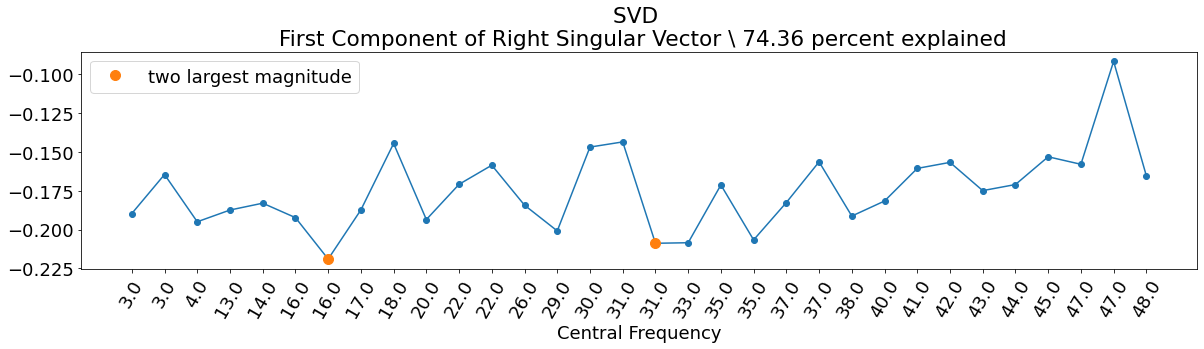

In [230]:
# sort the vectors based on central frequency
# load the model
# Created on 10/23/22 at 3:25 PM 

# Author: Jenny Sun             

import torch
import numpy as np
import seaborn as sns



def scatter(v,idx):
    for i in range(0,100):
        plt.plot(v[i,:][idx], 'o',color = 'blue')
    plt.xlabel('Central Frequency from low to high')
    plt.show()

def violin(f_central, v,idx):
    cn = f_central[idx]
    plt.figure(figsize = (30,4))
    sns.violinplot(data = v[:,idx], width = 3)
    p = plt.xticks(range(len(cn)), np.round(f_central[idx]), rotation = 60)

    plt.xlabel('Central Frequency ')
    plt.show()

# svd the matrix
def svdplot(f_central,v,idx):
    u,s,vh = np.linalg.svd(v[:,idx])
    variance = s[0] / sum(s) *100
    plt.figure(figsize = (20,4))
    idxM = np.argsort(np.abs(vh[0,:]))[::-1]
    print(idxM)
    p = plt.plot(vh[0,:], '-o')
    p = plt.plot(np.arange(len(v))[idxM[0:2]],vh[0,:][idxM[0:2]], 'o', markersize = 10, label = 'two largest magnitude')
    p = plt.xticks(range(len(cn)), np.round(f_central[idx]), rotation = 60)
    plt.title('SVD \n First Component of Right Singular Vector \ %.2f percent explained' % variance)
    plt.legend()
    plt.xlabel('Central Frequency')
    plt.show()

# get the attention vector

sub = 's110' 
sublist = ['s109','s100','s59','s110']   
branch = 'drift_bound'   # or choice
for s in sublist:
    v = np.load(DATADIR + s + '/' 'feature_test_mlp0_' + branch + '.3.npy')
    model = torch.load(MODELDIR + 'mymodel_' + s + '_' + MODEL_NAME[:-1] + '.pth')
    p_low, p_band, filt_beg_freq, filt_end_freq = getFilt(model_dic = model, \
            branchName = 'drift',sr =  500,cutoff = 50)
    f_central = (filt_end_freq + filt_beg_freq) /2
    idx = f_central.argsort()
    print("=======" + s + "===============")
    violin(f_central,v,idx)
    svdplot(f_central,v,idx)
    


# sort the vector by central frequency from low to high


